In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [24]:
data =pd.read_csv('TempNY.csv')
data.head()

,Year,Average,Unnamed: 2
0,1870,53.60,NaN
1,1871,51.13,NaN
2,1872,50.98,NaN
3,1873,50.98,NaN
4,1874,51.34,NaN


In [25]:
# Eliminar la columna 'Unnamed: 2'
data = data.drop(columns=['Unnamed: 2'], axis=1)
data.index = data['Year']
data = data.drop(columns=['Year'], axis=1)
data

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


Determina mediante la gráfica de prueba de Dickey-Fuller si los datos son estacionarios considerando una base de entrenamiento del 90% del total. En caso negativo, aplica tantas diferencias como sea necesario para alcanzar la estacionariedad y comenta al respecto.

In [26]:
# Dividir los datos en entrenamiento (90%) y prueba (10%)
train_size = int(len(data) * 0.9)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


print(f"Datos de entrenamiento: {len(train_data)} ({len(train_data)/len(data)*100:.1f}%) de {len(data)}")
print(f"Datos de prueba: {len(test_data)} ({len(test_data)/len(data)*100:.1f}%) de {len(data)}")
print(f"Rango de entrenamiento: {train_data.index[0]} - {train_data.index[-1]}")
print(f"Rango de prueba: {test_data.index[0]} - {test_data.index[-1]}")

Datos de entrenamiento: 135 (89.4%) de 151
Datos de prueba: 16 (10.6%) de 151
Rango de entrenamiento: 1870 - 2004
Rango de prueba: 2005 - 2020


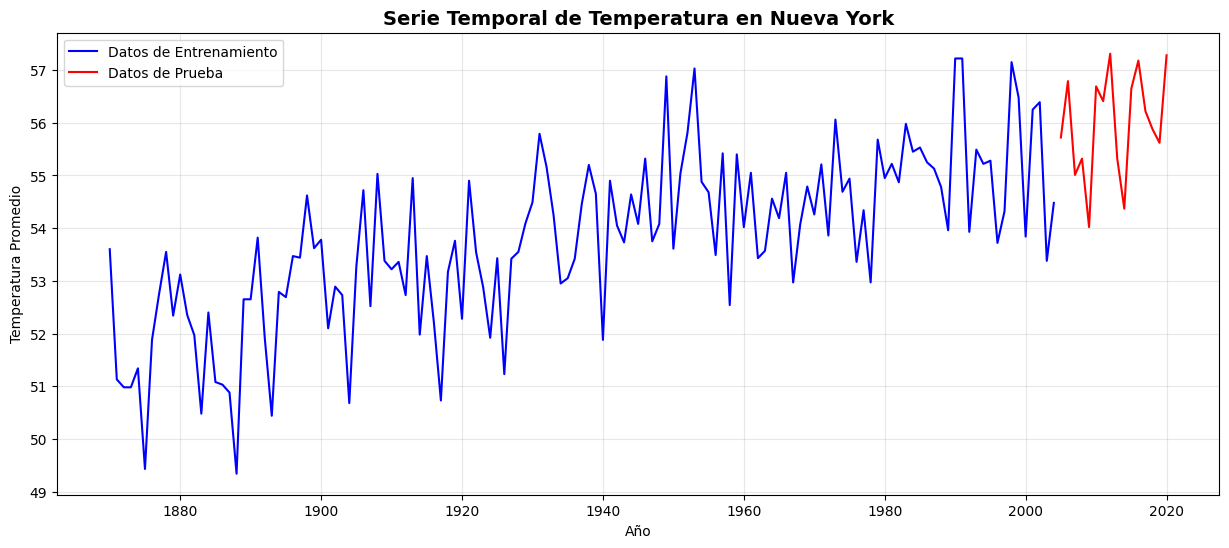

Estadísticas de los datos de entrenamiento:
count    135.000000
mean      53.761852
std        1.608328
min       49.340000
25%       52.770000
50%       53.760000
75%       54.920000
max       57.220000
Name: Average, dtype: float64


In [27]:
# Grafico de la serie temporal
plt.figure(figsize=(15, 6))

plt.plot(train_data.index, train_data['Average'], label='Datos de Entrenamiento', color='blue', linewidth=1.5)
plt.plot(test_data.index, test_data['Average'], label='Datos de Prueba', color='red', linewidth=1.5)
plt.title('Serie Temporal de Temperatura en Nueva York', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Estadísticas descriptivas
print("Estadísticas de los datos de entrenamiento:")
print(train_data['Average'].describe())

In [28]:
# Prueba de Dickey-Fuller en datos originales
result_original = adfuller(train_data['Average'])
print('Resultados de la prueba ADF en datos originales:')
print(f'Estadístico ADF: {result_original[0]:.6f}')
print(f'Valor p: {result_original[1]:.6f}')

# Interpretación
print('\nInterpretación:')
if result_original[1] <= 0.05:
    print("ESTACIONARIA: Rechazamos la hipótesis nula (p-value ≤ 0.05)")
    print("   Los datos son estacionarios.")
else:
    print("NO ESTACIONARIA: No rechazamos la hipótesis nula (p-value > 0.05)")
    print("   Los datos NO son estacionarios.")

Resultados de la prueba ADF en datos originales:
Estadístico ADF: -1.717709
Valor p: 0.422012

Interpretación:
NO ESTACIONARIA: No rechazamos la hipótesis nula (p-value > 0.05)
   Los datos NO son estacionarios.


In [29]:
# diferenciación para lograr estacionariedad

train_data['Temp_change'] = train_data['Average'].diff().dropna()
train_data = train_data.dropna()
train_data

,Average,Temp_change
Year,,
1871,51.13,-2.47
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
1875,49.43,-1.91
...,...,...
2000,53.84,-2.64
2001,56.25,2.41
2002,56.39,0.14


In [30]:
result2 = adfuller(train_data['Temp_change'])
print('\nResultados de la prueba ADF después de la diferenciación:')
print(f'Estadístico ADF: {result2[0]:.6f}')
print(f'Valor p: {result2[1]:.6f}')

# Interpretación
print('\nInterpretación:')
if result2[1] <= 0.05:
        print("ESTACIONARIA: Rechazamos la hipótesis nula (p-value ≤ 0.05)")
        print("   Los datos son estacionarios.")
else:
        print("NO ESTACIONARIA: No rechazamos la hipótesis nula (p-value > 0.05)")
        print("   Los datos NO son estacionarios.")


Resultados de la prueba ADF después de la diferenciación:
Estadístico ADF: -8.460582
Valor p: 0.000000

Interpretación:
ESTACIONARIA: Rechazamos la hipótesis nula (p-value ≤ 0.05)
   Los datos son estacionarios.


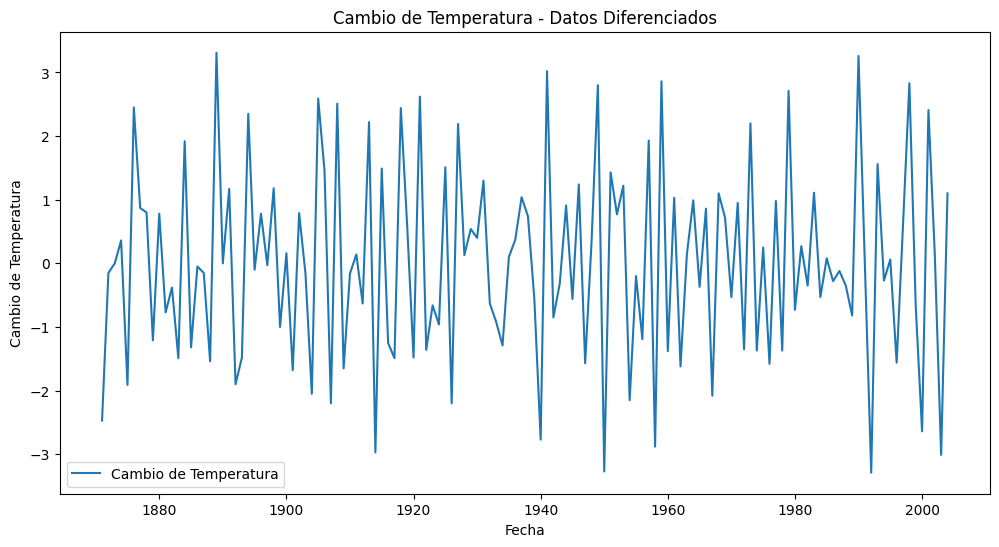

In [31]:
# grafica de los datos diferenciados
plt.figure(figsize=(12, 6))
plt.plot(train_data['Temp_change'], label='Cambio de Temperatura')
plt.title('Cambio de Temperatura - Datos Diferenciados')
plt.xlabel('Fecha')
plt.ylabel('Cambio de Temperatura')
plt.legend()
plt.show()

Obtén los parámetros óptimos mediante el índice de información de Akaike (a partir del resultado anterior), compara al menos 6 combinaciones diferentes de parámetros p, d y q en el modelo general ARIMA(p, d, q).

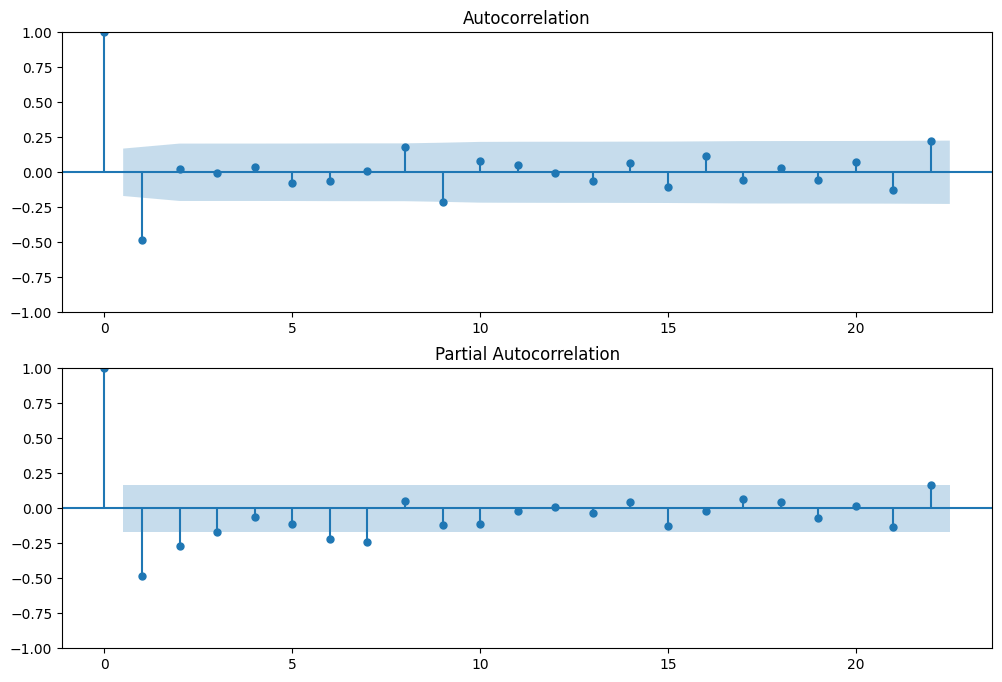

In [32]:
# graficas ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_data['Temp_change'], ax=ax[0])
plot_pacf(train_data['Temp_change'], ax=ax[1])
plt.show()

In [33]:
import warnings
warnings.filterwarnings("ignore")

model_ar1 = ARIMA(train_data['Temp_change'], order=(1, 0, 0))
res_ar1 = model_ar1.fit()
print(f"El AIC del modelo AR(1) es: {res_ar1.aic:.2f}")

El AIC del modelo AR(1) es: 464.28


In [34]:
model_ar2 = ARIMA(train_data['Temp_change'], order=(2, 0, 0))
res_ar2 = model_ar2.fit()
print(f"El AIC del modelo AR(2) es: {res_ar2.aic:.2f}")

El AIC del modelo AR(2) es: 455.49


In [35]:
model_ar3 = ARIMA(train_data['Temp_change'], order=(1, 1, 0))
res_ar3 = model_ar3.fit()
print(f"El AIC del modelo AR(3) es: {res_ar3.aic:.2f}")

El AIC del modelo AR(3) es: 559.32


In [36]:
model_ar4 = ARIMA(train_data['Temp_change'], order=(2, 1, 0))
res_ar4 = model_ar4.fit()
print(f"El AIC del modelo AR(4) es: {res_ar4.aic:.2f}")

El AIC del modelo AR(4) es: 525.30


In [37]:
model_ar5 = ARIMA(train_data['Temp_change'], order=(2, 0, 1))
res_ar5 = model_ar5.fit()
print(f"El AIC del modelo AR(5) es: {res_ar5.aic:.2f}")

El AIC del modelo AR(5) es: 430.20


In [38]:
model_ar6 = ARIMA(train_data['Temp_change'], order=(2, 0, 2))
res_ar6 = model_ar6.fit()
print(f"El AIC del modelo AR(6) es: {res_ar6.aic:.2f}")

El AIC del modelo AR(6) es: 430.28


In [39]:
# resultados de los modelos

print(f"El AIC del modelo AR(1) es: {res_ar1.aic:.2f} order=(1,0,0)")
print(f"El AIC del modelo AR(2) es: {res_ar2.aic:.2f} order=(2,0,0)")
print(f"El AIC del modelo AR(3) es: {res_ar3.aic:.2f} order=(1,1,0)")
print(f"El AIC del modelo AR(4) es: {res_ar4.aic:.2f} order=(2,1,0)")
print(f"El AIC del modelo AR(5) es: {res_ar5.aic:.2f} order=(2,0,1)")
print(f"El AIC del modelo AR(6) es: {res_ar6.aic:.2f} order=(2,0,2)")

El AIC del modelo AR(1) es: 464.28 order=(1,0,0)
El AIC del modelo AR(2) es: 455.49 order=(2,0,0)
El AIC del modelo AR(3) es: 559.32 order=(1,1,0)
El AIC del modelo AR(4) es: 525.30 order=(2,1,0)
El AIC del modelo AR(5) es: 430.20 order=(2,0,1)
El AIC del modelo AR(6) es: 430.28 order=(2,0,2)


Conclusion: la serie de tiempo original de temperatua se modela bien con ARIMA (2,0,1)

In [40]:
data

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


In [41]:
modelo = ARIMA(data['Average'], order=(2, 0, 1))
resultado = modelo.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                  151
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -240.783
Date:              jue., 02 oct. 2025   AIC                            491.565
Time:                        00:25:52   BIC                            506.652
Sample:                             0   HQIC                           497.694
                                - 151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.9696      2.398     22.508      0.000      49.270      58.669
ar.L1          1.0604      0.114      9.279      0.000       0.836       1.284
ar.L2         -0.0646      0.112     -0.579      0.5

Haz una gráfica (al resultado óptimo obtenido previamente) que incluya los datos de prueba, los de entrenamiento, y las predicciones puntuales y de intervalo para la base de prueba. 

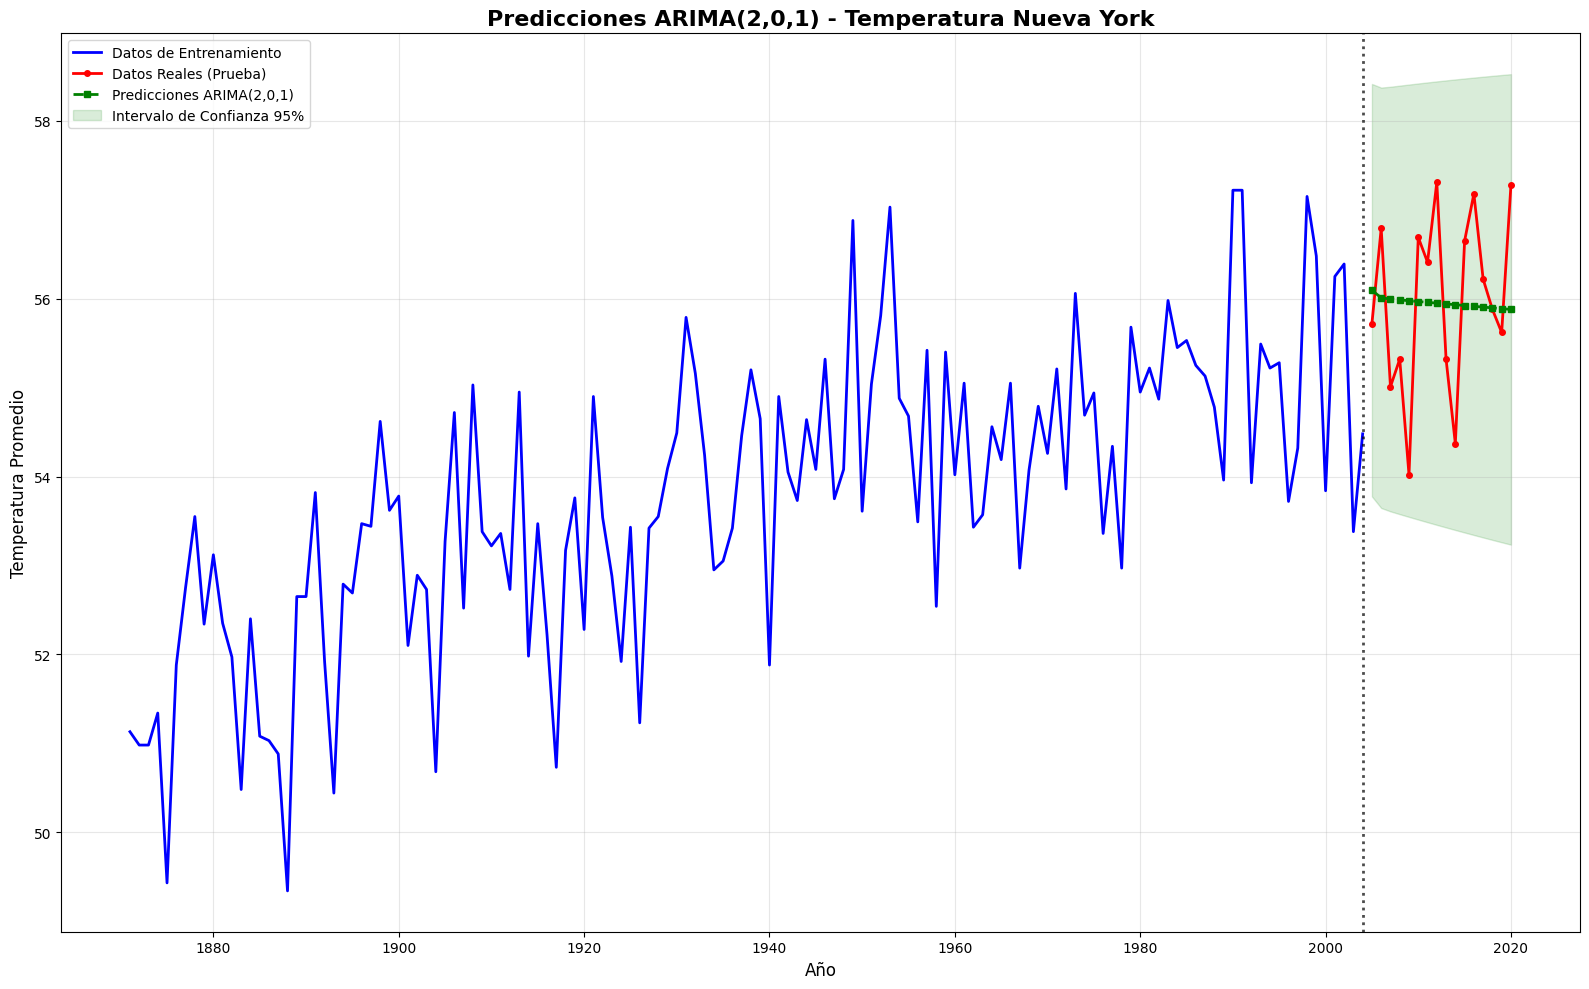

PREDICCIONES vs VALORES REALES
2005: Real= 55.72°F, Predicción= 56.10°F, Error= 0.38°F
2006: Real= 56.79°F, Predicción= 56.01°F, Error= 0.78°F
2007: Real= 55.01°F, Predicción= 56.00°F, Error= 0.99°F
2008: Real= 55.32°F, Predicción= 55.99°F, Error= 0.67°F
2009: Real= 54.02°F, Predicción= 55.98°F, Error= 1.96°F
2010: Real= 56.69°F, Predicción= 55.97°F, Error= 0.72°F
2011: Real= 56.41°F, Predicción= 55.96°F, Error= 0.45°F
2012: Real= 57.31°F, Predicción= 55.95°F, Error= 1.36°F
2013: Real= 55.32°F, Predicción= 55.94°F, Error= 0.62°F
2014: Real= 54.37°F, Predicción= 55.93°F, Error= 1.56°F
2015: Real= 56.65°F, Predicción= 55.92°F, Error= 0.73°F
2016: Real= 57.18°F, Predicción= 55.91°F, Error= 1.27°F
2017: Real= 56.22°F, Predicción= 55.91°F, Error= 0.31°F
2018: Real= 55.88°F, Predicción= 55.90°F, Error= 0.02°F
2019: Real= 55.62°F, Predicción= 55.89°F, Error= 0.27°F
2020: Real= 57.28°F, Predicción= 55.88°F, Error= 1.40°F


In [42]:
# grafica usando el modelo de ARIMA (2,0,1)

n_forecast = len(test_data)
forecast = resultado.forecast(steps=n_forecast)
forecast_ci = resultado.get_forecast(steps=n_forecast).conf_int()

plt.figure(figsize=(16, 10))

# Datos de entrenamiento
plt.plot(train_data.index, train_data['Average'], 
         label='Datos de Entrenamiento', color='blue', linewidth=2)

# Datos reales de prueba
plt.plot(test_data.index, test_data['Average'], 
         label='Datos Reales (Prueba)', color='red', linewidth=2, marker='o', markersize=4)
plt.plot(test_data.index, forecast, 
         label='Predicciones ARIMA(2,0,1)', color='green', linewidth=2, linestyle='--', marker='s', markersize=4)

# Intervalo de confianza
plt.fill_between(test_data.index, 
                 forecast_ci.iloc[:, 0],  # Límite inferior
                 forecast_ci.iloc[:, 1],  # Límite superior
                 color='green', alpha=0.15, label='Intervalo de Confianza 95%')

# Línea divisoria
plt.axvline(x=train_data.index[-1], color='black', linestyle=':', alpha=0.7, linewidth=2)

plt.title('Predicciones ARIMA(2,0,1) - Temperatura Nueva York', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Temperatura Promedio', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tabla comparativa
print("="*60)
print("PREDICCIONES vs VALORES REALES")
print("="*60)
for i, year in enumerate(test_data.index):
    real = test_data['Average'].iloc[i]
    pred = forecast.iloc[i]
    error = abs(real - pred)
    print(f"{year}: Real= {real:.2f}°F, Predicción= {pred:.2f}°F, Error= {error:.2f}°F")

Responde a la pregunta: ¿Son confiables sus pronósticos? Justifica tu respuesta con los indicadores del error vistos en este curso.

In [43]:
# Verificación de datos y cálculo de errores

from sklearn.metrics import r2_score
import numpy as np

# Convertir a arrays numpy para asegurar compatibilidad
test_values = test_data['Average'].values
forecast_values = forecast.values

# Eliminar NULOS si los hay
mask = ~(np.isnan(test_values) | np.isnan(forecast_values))
test_clean = test_values[mask]
forecast_clean = forecast_values[mask]
errors = test_clean - forecast_clean
abs_errors = np.abs(errors)

# Métricas de error
rmse = np.sqrt(np.mean(errors ** 2))
mae = np.mean(abs_errors)
mape = np.mean(abs_errors / test_clean) * 100
mse = np.mean(errors ** 2)
r2 = r2_score(test_clean, forecast_clean)

print("\n" + "="*60)
print("INDICADORES DE ERROR")
print("="*60)
print(f"RMSE: {rmse:.3f} °F")
print(f"MAE: {mae:.3f} °F")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.4f}")

# Conclusión
if rmse <= 2.0 and mape <= 10 and r2 >= 0.7:
    conclusion = "CONFIABLES"
else:
    conclusion = "POCO CONFIABLES"

print(f"\nConclusión: Los pronósticos son {conclusion}")


INDICADORES DE ERROR
RMSE: 0.989 °F
MAE: 0.842 °F
MAPE: 1.51%
MSE: 0.979
R²: -0.0300

Conclusión: Los pronósticos son POCO CONFIABLES
